首先安装 biopython 库

In [1]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


然后我我们下载[一段DNA序列](https://www.kaggle.com/datasets/nageshsingh/dna-sequence-dataset)然后打开它

In [2]:
#import biopython
from Bio import SeqIO
for seq_record in SeqIO.parse('M:\\AI\\bio\\stepLEAP\\example_dna.fa', "fasta"):
    print(seq_record.id)
    #print(seq_record.seq)


ENST00000435737.5
ENST00000419127.5


然后序列化这一段 DNA 编码

In [3]:
# function to convert a DNA sequence string to a numpy array
# converts to lower case, changes any non 'acgt' characters to 'n'
import numpy as np
import re
def string_to_array(my_string):
    my_string = my_string.lower()
    my_string = re.sub('[^acgt]', 'z', my_string)
    my_array = np.array(list(my_string))
    return my_array

# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

# function to encode a DNA sequence string as an ordinal vector
# returns a numpy vector with a=0.25, c=0.50, g=0.75, t=1.00, n=0.00
def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0.25 # A
    float_encoded[float_encoded == 1] = 0.50 # C
    float_encoded[float_encoded == 2] = 0.75 # G
    float_encoded[float_encoded == 3] = 1.00 # T
    float_encoded[float_encoded == 4] = 0.00 # anything else, z
    return float_encoded

#test_sequence = 'AACGCGCTTNN'
#ordinal_encoder(string_to_array(test_sequence))


还可以使用 one-hot 编码 以及 k-mer 计数

In [4]:
def getKmers(sequence, size):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]
#mySeq = 'CATGGCCATCCCCCCCCGAGCGGGGGGGGGG'
#print(getKmers(mySeq, size=6))


接下来读入一段人类的DNA

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline  
human = pd.read_table('M:\\AI\\bio\\stepLEAP\\human.txt')
print(human.head())


                                            sequence  class
0  ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1  ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4  ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3


In [6]:
chimp = pd.read_table( 'M:\\AI\\bio\\stepLEAP\\chimpanzee.txt')
dog = pd.read_table('M:\\AI\\bio\\stepLEAP\\dog.txt')
print(chimp.head())
print(dog.head())


                                            sequence  class
0  ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...      4
1  ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...      4
2  ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...      4
3  ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...      4
4  ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...      6
                                            sequence  class
0  ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...      4
1  ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...      4
2  ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...      6
3  ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...      6
4  ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...      0


读取图片（但是这个数据集没有）

In [7]:
from IPython.display import Image
Image('M:\\AI\\bio\\stepLEAP\\capture1.png')


定义函数收集到所有 k-mers

In [8]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]


In [9]:
human['words'] = human.apply(lambda x: getKmers(x['sequence']), axis=1)
human = human.drop('sequence', axis=1)
chimp['words'] = chimp.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp = chimp.drop('sequence', axis=1)
dog['words'] = dog.apply(lambda x: getKmers(x['sequence']), axis=1)
dog = dog.drop('sequence', axis=1)

# print(human.head())
# pandas 给出的用法是 DataFrame.apply(self, func, axis=0, raw=False, result_type=None, args=(), **kwds
# axis:
# 0 或者 index ，表示函数处理的是每一列；
# 1 或 columns ，表示处理的是每一行;
# raw:
# False ，表示把每一行或列作为 Series 传入函数中；
# True，表示接受的是 ndarray 数据类型；

In [10]:
human_texts = list(human['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_h = human.iloc[:, 0].values                         #y_h for human

# human_texts 是基因数量
print(human_texts[0])
# print(y_h)

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [11]:
chimp_texts = list(chimp['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_c = chimp.iloc[:, 0].values                       # y_c for chimp

dog_texts = list(dog['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_d = dog.iloc[:, 0].values                         # y_d for dog


In [12]:
chimp_texts = list(chimp['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_c = chimp.iloc[:, 0].values                       # y_c for chimp

dog_texts = list(dog['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_d = dog.iloc[:, 0].values                         # y_d for dog


In [13]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)


(4380, 232414)
(1682, 232414)
(820, 232414)


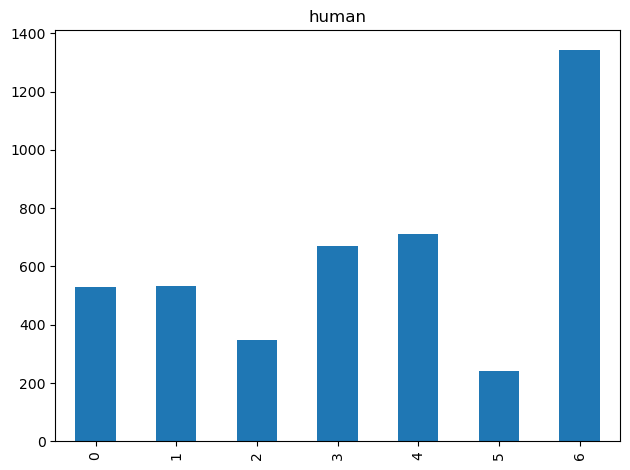

In [14]:
human['class'].value_counts().sort_index().plot.bar(title="human")
plt.tight_layout()
plt.show()


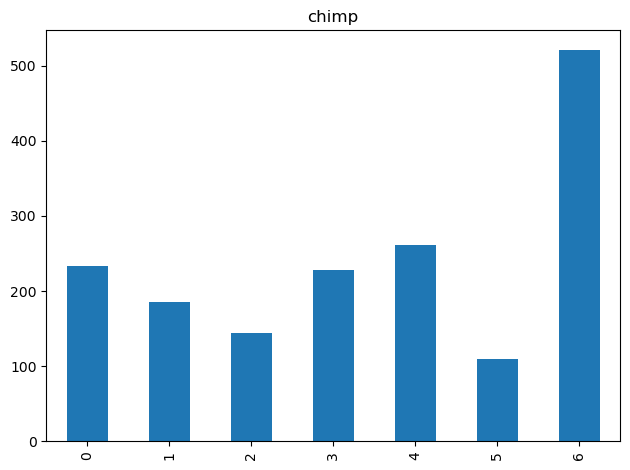

In [15]:
chimp['class'].value_counts().sort_index().plot.bar(title="chimp")
plt.tight_layout()
plt.show()


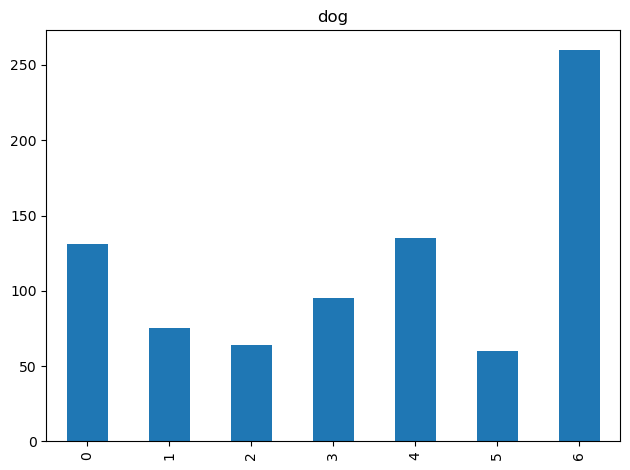

In [16]:
dog['class'].value_counts().sort_index().plot.bar(title="dog")
plt.tight_layout()
plt.show()


接下来才是真正的ML部分，首先划分训练集和测试集

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_h, test_size = 0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)



(3504, 232414)
(876, 232414)


In [18]:

### Multinomial Naive Bayes Classifier ###
# The alpha parameter was determined by grid search previously
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)


MultinomialNB(alpha=0.1)

In [19]:
y_pred = classifier.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix on human genes\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))


Confusion matrix on human genes

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [21]:
# Predicting the chimp, dog and worm sequences
y_pred_chimp = classifier.predict(X_chimp)
y_pred_dog = classifier.predict(X_dog)

# performance on chimp genes
print("Confusion matrix on chimp genes\n")
print(pd.crosstab(pd.Series(y_c, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_c, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))



Confusion matrix on chimp genes

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


In [22]:
# performance on dog genes
print("Confusion matrix on dog genes\n")
print(pd.crosstab(pd.Series(y_d, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_d, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))


Confusion matrix on dog genes

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925
